In [25]:
# Trees and Forests
import numpy as np
import pydotplus
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel

from IPython.display import Image

In [4]:
# Training a Decision Tree Classifier

# load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# create decision tree classifier object
# by deafault it uses Gini index for impurity
decisiontree = DecisionTreeClassifier(random_state=0)
# train model
model = decisiontree.fit(features, target)

# make new observation
observation = [[5, 4, 3, 2]]
# predict observation's class
model.predict(observation)

# see predicted class prababilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

In [5]:
# create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy',
                                             random_state=0)
# train model
model_entropy = decisiontree_entropy.fit(features, target)

In [9]:
# TRAINING A DECISION TREE REGRESSOR

# load data with only two features
boston = datasets.load_boston()
features = boston.data[:, :2]
target = boston.target

# create decision tree classifier object
# instead of reducing Gini or entropy 
# regressor try to reduce mean squared error (MSE)
decisiontree = DecisionTreeRegressor(random_state=0)
# train model
model = decisiontree.fit(features, target)

# make new observation
observation = [[0.02, 16]]
# predict value
model.predict(observation)

array([33.])

In [10]:
# let's change criterion from MSE to mean absolute error (MAE)
decisiontree_mae = DecisionTreeRegressor(criterion='mae',
                                        random_state=0)
# train model
madel_mae = decisiontree_mae.fit(features, target)

In [2]:
# VISUALIZING A DECISION TREE MODEL

# load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# train model
model = decisiontree.fit(features, target)

# create DOT data
dot_data = tree.export_graphviz(decisiontree,
                               out_file=None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names)

# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [5]:
# TRAINING A RANDOM FOREST CLASSIFIER

# load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# create random forest classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_jobs=-1)
# train model
model = randomforest.fit(features, target)

# make a new observation
observation = [[5, 4, 3, 2]]
model.predict(observation)

array([1])

In [6]:
# we also can change criterion in random forest
randomforest_entropy = RandomForestClassifier(criterion='entropy',
                                             random_state=0)
# train model
model_entropy = randomforest_entropy.fit(features, target)

In [9]:
# TRAINIG A RANDOM FOREST REGRESSOR

# load data
boston = datasets.load_boston()
features = boston.data[:, :2]
target = boston.target

# create random forest regressor
randomforest = RandomForestRegressor(random_state=0,
                                    n_jobs=-1)
# fit model
model = randomforest.fit(features, target)

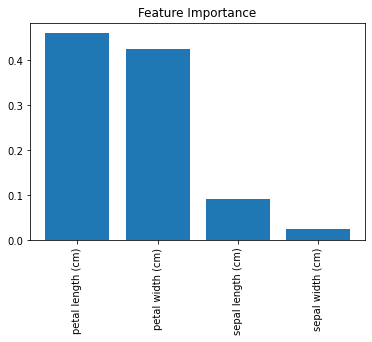

In [15]:
# IDENTIFYING IMPORTANT FEATURES IN RANDOM FOREST

# load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# create random forest classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_jobs=-1)
# train model
model = randomforest.fit(features, target)

# calculate feature importances
importances = model.feature_importances_
# sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# create plot
plt.figure()
plt.title('Feature Importance')
# add bars
plt.bar(range(features.shape[1]), importances[indices])
# add feature names as x-aaxis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# show plot
plt.show()

In [21]:
# SELCTING IMPORTANT FEATURES IN RANDOM FOREST

# load data
iris = datasets.load_iris()
features, target = iris.data, iris.target

# create random forest classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_jobs=-1)

# create object that selects features with importance greater than
# or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# train model using most important features
model = randomforest.fit(features_important, target)

In [23]:
# HANDLING IMBALANCED CLASSES

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# make class highly imbalanced by removing first 40 observations
features = features[40:, :]
target = target[40:]

# create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# create random forest classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_jobs=-1,
                                     class_weight='balanced')

# train model
model = randomforest.fit(features, target)

In [24]:
# CONTROLLING TREE SIZE

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0)

# train model
model = decisiontree.fit(features, target)

In [26]:
# IMPROVING PERFORMANCE THROUGH BOOSTING

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)
# train model
model = adaboost.fit(features, target)


In [27]:
# EVALUATING RANDOM FOREST WITH OUT-OF-BAG ERRORS

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create random tree classifier object
randomforest = RandomForestClassifier(random_state=0,
                                     n_estimators=1000,
                                     oob_score=True,
                                     n_jobs=-1)
# train model
model = randomforest.fit(features, target)
# view out of bag error
model.oob_score_

0.9533333333333334